In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/Users/suparnac/dev_envs/CV_Projects/Heart_Disease(csv)/dataset.csv')
df.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
# Display info about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [4]:
# Check for missing values
print("CHecking for Missing Values in Each Column:")
print(df.isnull().sum())

CHecking for Missing Values in Each Column:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [5]:
# Summary statistics of numeric features
print("Summary Statistics:")
df.describe()

Summary Statistics:


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


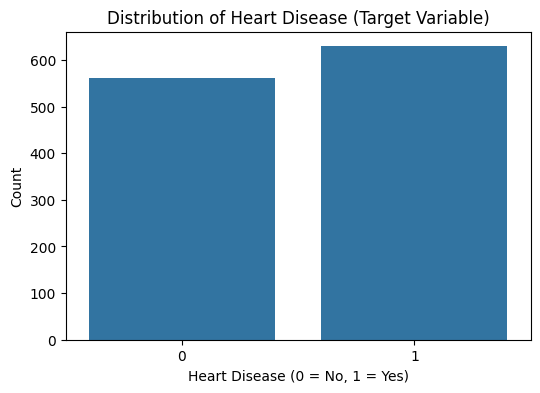

In [6]:
# Distribution of the target variable 
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease (Target Variable)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
#check for boolean values and encode them
print(df.head()) 
print(df.columns) # Check for all column names exactly


   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
Index(['age', 'sex', 'chest pain type', 'resting bp s', '

In [9]:
# List of nominal columns to one-hot encode
nominal_cols = ['chest pain type', 'resting ecg', 'ST slope']

# Perform one-hot encoding with integer output (0/1)
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True, dtype=int)

# Find any remaining boolean columns and convert them to 0/1 integers 
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [10]:
#check encoded vales (just re-checking for the changes
print(df.head())  
print(df.columns) 


   age  sex  resting bp s  cholesterol  fasting blood sugar  max heart rate  \
0   40    1           140          289                    0             172   
1   49    0           160          180                    0             156   
2   37    1           130          283                    0              98   
3   48    0           138          214                    0             108   
4   54    1           150          195                    0             122   

   exercise angina  oldpeak  target  chest pain type_2  chest pain type_3  \
0                0      0.0       0                  1                  0   
1                0      1.0       1                  0                  1   
2                0      0.0       0                  1                  0   
3                1      1.5       1                  0                  0   
4                0      0.0       0                  0                  1   

   chest pain type_4  resting ecg_1  resting ecg_2  ST slope_1

In [11]:
# Define numeric columns to scale
numeric_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Initialize the scaler
scaler = StandardScaler()

# Scale numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [12]:
X = df.drop('target', axis=1)
y = df['target']


In [13]:
# Split dataset: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 833
Test set size: 357


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
# Initialize the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)



In [16]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 0.8599

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       168
           1       0.86      0.88      0.87       189

    accuracy                           0.86       357
   macro avg       0.86      0.86      0.86       357
weighted avg       0.86      0.86      0.86       357


Confusion Matrix:
[[141  27]
 [ 23 166]]


checking with random forest for the iomproved performance (as logistic regression model gave 86% accuracy checking for better model)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)


In [19]:
# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Test Accuracy: 0.9244

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       168
           1       0.93      0.93      0.93       189

    accuracy                           0.92       357
   macro avg       0.92      0.92      0.92       357
weighted avg       0.92      0.92      0.92       357


Confusion Matrix:
[[154  14]
 [ 13 176]]


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


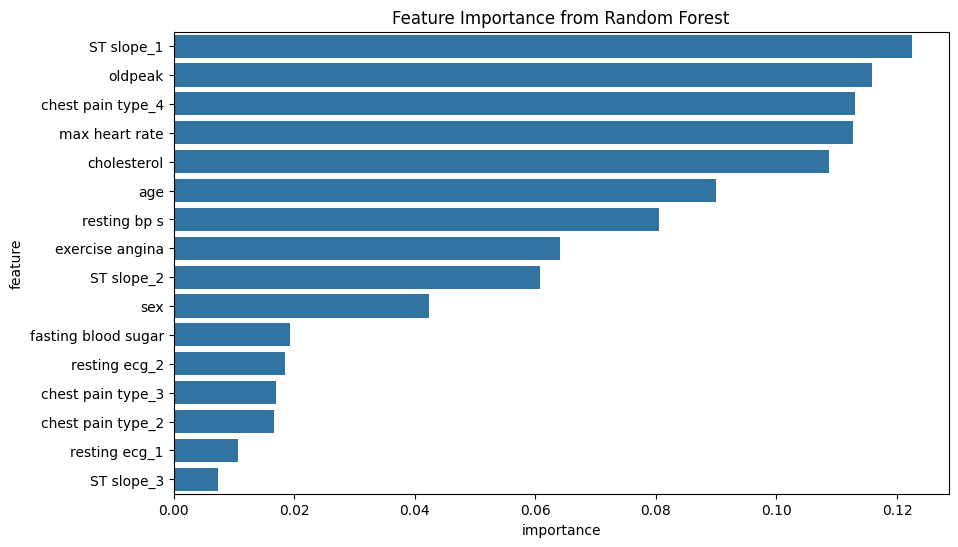

In [21]:
##let's i nterpret the model

# Get feature importances from Random Forest
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_imp_df)
plt.title('Feature Importance from Random Forest')
plt.show()


key points summarizing the heart disease prediction analysis:
- The dataset contains patient vitals and clinical features relevant to heart disease diagnosis.
- Data preprocessing included converting categorical features to numeric, scaling, and splitting into training and test sets.
- Logistic Regression achieved 86% accuracy, demonstrating a solid baseline for binary classification.
- A Random Forest model improved accuracy to over 92%, showing better performance by capturing complex feature interactions.
- Feature importance analysis from Random Forest highlights the most influential patient attributes for predicting heart disease risk.
- The Random Forest improved accuracy by approximately 6% compared to Logistic Regression.
- Precision, recall, and F1-score for detecting heart disease (class 1) also improved by around 7%.
- Confusion matrix values for Random Forest:
	*	True Negatives: 154
	*	False Positives: 14
	*	False Negatives: 13
	*	True Positives: 176
This numerical summary shows that Random Forest provides more reliable heart disease prediction, reducing both false negatives and false positives significantly compared to Logistic Regression.

In [22]:
#saving the model
import joblib

# Save the Random Forest model as it performed better than logistic regression model
joblib.dump(rf_model, 'random_forest_heart_disease_model.pkl')


['random_forest_heart_disease_model.pkl']